In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import notebook
import sys
from icecube import astro
sys.path.append('/home/apizzuto/Nova/scripts/')
from Novae import Nova
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions import *
from matplotlib.lines import Line2D

import matplotlib as mpl
mpl.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.unicode'] = True
# mpl.rcParams['mathtext.rm'] = 'Times New Roman'
# mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
# mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# mpl.rc('font', family='serif', size=16)
# mpl.rcParams['xtick.labelsize'] = 16
# mpl.rcParams['ytick.labelsize'] = 16
# mpl.rcParams['xtick.major.size'] = 5
# mpl.rcParams['ytick.major.size'] = 5
# mpl.rcParams['xtick.minor.size'] = 3
# mpl.rcParams['ytick.minor.size'] = 3
# mpl.rcParams['axes.labelsize'] = 18
# mpl.rcParams['xtick.direction'] = 'in'
# mpl.rcParams['ytick.direction'] = 'in'
# mpl.rcParams['ytick.right'] = True
# mpl.rcParams['xtick.top'] = True
# mpl.rcParams['axes.grid'] = True
# mpl.rcParams['axes.grid.which'] = 'major'
# mpl.rcParams['grid.color'] = 'lightgrey'
# mpl.rcParams['grid.alpha'] = 0.4
# mpl.rcParams['grid.linewidth'] = 0.75
# mpl.rcParams['lines.linewidth'] = 1.5

In [3]:
df = pd.read_csv('/home/apizzuto/Nova/Novae_details.csv')

In [4]:
a = Nova('16ma', 2.08, 0.0, np.radians(-28.), 57657.0, 10, flux_norm=3.92e-8, cutoff=12)
nova = a

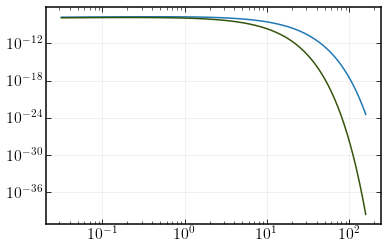

In [8]:
spec = nova.spectrum(ens)
plt.plot(ens, ens**2*spec)
nu_spec = nova.neutrino_spectrum(ens)
plt.plot(ens, ens**2*nu_spec, c = sns.xkcd_rgb['navy green'])
plt.loglog()
plt.show()

In [4]:
novae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], row['EPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['EPL flux']*1e-7, cutoff = row['EPL cutoff '])
    novae.append(a)

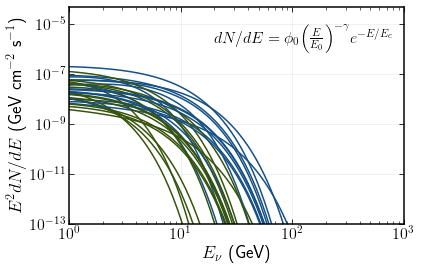

In [7]:
ens = np.logspace(-1.5, 2.2, 100)
for nova in novae:
    spec = nova.spectrum(ens)
    plt.plot(ens, ens**2*spec, c = sns.xkcd_rgb['light navy'])
    nu_spec = nova.neutrino_spectrum(ens)
    plt.plot(ens, ens**2*nu_spec, c = sns.xkcd_rgb['navy green'])
    
plt.loglog()
plt.ylim(1e-13, 5e-5)
plt.xlim(1e0, 1e3)
plt.xlabel(r'$E_{\nu}$ (GeV)')
plt.ylabel(r'$E^2 dN / dE$ (GeV cm$^{-2}$ s$^{-1}$)')
plt.text(2e1, 1e-6, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}e^{-E/E_c}$')
plt.savefig('/home/apizzuto/public_html/novae/all_spectra_with_cutoff.png', dpi=150, bbox_inches='tight')
plt.show()

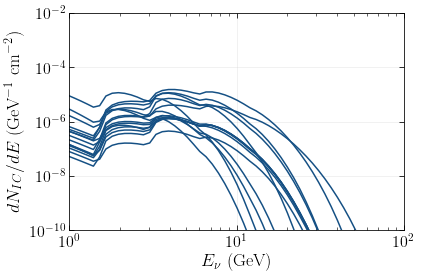

In [8]:
time_integrated = True
for nova in novae:
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e2)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$ s$^{-1}$)'
plt.ylabel(r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$)')
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

0.0002901412859618441
0.0003357506851515421
5.600232573315678e-05
8.262604577361949e-05
4.0248992665801336e-05
0.00016548167048566505
0.0002517113319656344
4.5950307076937824e-05
0.0005332156200933539
5.634197139609076e-05
0.00019613289187914688
3.4217251691103785e-05
3.6665324435333676e-05
3.941252825654459e-05
1.2942542492136657e-05

2.7508075390747144e-05
5.795198016685607e-05
6.064134588596986e-06
8.732309740916327e-06
5.067954633054939e-06
3.598366012100128e-05
3.940214395722387e-05
6.8769453524059655e-06
0.00010753939858387257
8.171544477573237e-06
3.517026602372607e-05
6.41791164969769e-06
6.679944811583837e-06
6.851557089998072e-06
2.2962407975226598e-06


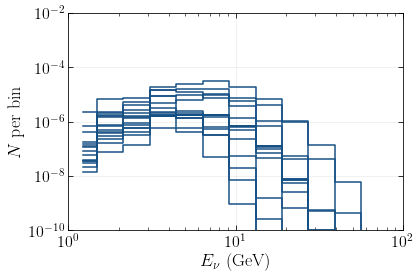

In [9]:
time_integrated = True
en_bins = np.logspace(0., 3., 20)
for nova in novae:
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    plt.step(mids(en_bins), dnde[0], c = sns.xkcd_rgb['light navy'], where = 'mid')
    print dnde[1]
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e2)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$N$ per bin'
else:
    ylabstr = r'$N$ per bin (s$^{-1}$)'
plt.ylabel(ylabstr)
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_binned_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

In [8]:
def mids(arr):
    return arr[:-1] + (np.diff(arr) / 2.)

In [11]:
novae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], row['SPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None)
    novae.append(a)

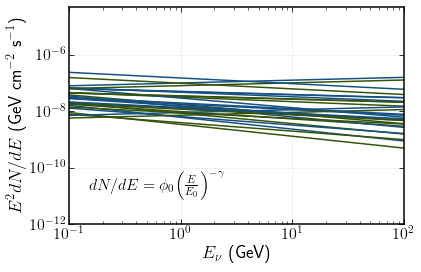

In [12]:
ens = np.logspace(-1.5, 2.2, 100)
for nova in novae:
    spec = nova.spectrum(ens)
    plt.plot(ens, ens**2.* spec, c = sns.xkcd_rgb['light navy'])
    nu_spec = nova.neutrino_spectrum(ens)
    plt.plot(ens, ens**2*nu_spec, c = sns.xkcd_rgb['navy green'])
    
plt.loglog()
plt.ylim(1e-12, 5e-5)
plt.xlim(1e-1, 1e2)
plt.xlabel(r'$E_{\nu}$ (GeV)')
plt.ylabel(r'$E^2 dN / dE$ (GeV cm$^{-2}$ s$^{-1}$)')
plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.savefig('/home/apizzuto/public_html/novae/all_spectra_powerlaw.png', dpi=150, bbox_inches='tight')
plt.show()

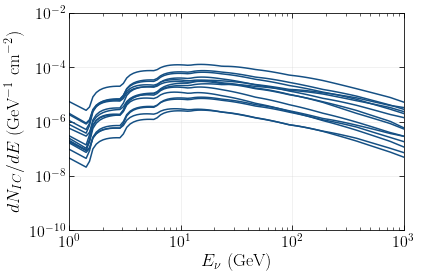

In [11]:
time_integrated = True
ens = np.logspace(0., 3., 100)
for nova in novae:
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e3)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$ s$^{-1}$)'
plt.ylabel(ylabstr)
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_powerlaw.png', dpi=150, bbox_inches='tight')
plt.show()

0.02800406151656907
0.011297198671345855
0.004213617944158374
0.004440380490042145
0.0020858849870796043
0.001072159427572928
0.0003628927704933896
0.014876013527296776
0.01047571726282252
0.0077330270680667345
0.0015315639753246378
0.01401738004277036
0.0011025323805593304
0.0004349127651388598


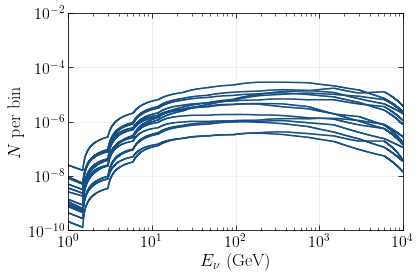

In [13]:
time_integrated = True
en_bins = np.logspace(0., 4., 2000)
tot = 0
for nova in novae:
    if nova.name == 'V679 Car':
        continue
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    plt.step(mids(en_bins), dnde[0], c = sns.xkcd_rgb['light navy'], where = 'mid')
    #print nova.name
    print dnde[1] 
    #print '\n'
    tot += dnde[1]
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e4)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$N$ per bin'
else:
    ylabstr = r'$N$ per bin (s$^{-1}$)'
plt.ylabel(ylabstr)
plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_binned_powerlaw.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

0.01123478886695434
6.46169598006253e-05


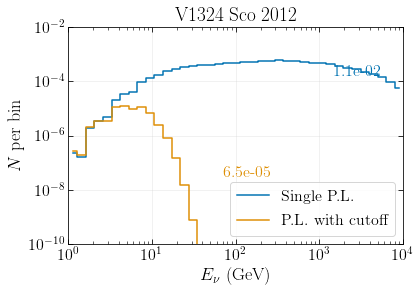

In [14]:
v1324sco = df.iloc[1]
row = v1324sco
sco_spl = Nova(row['Name'], -1.*row['SPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None)
sco_epl = Nova(row['Name'], -1*row['EPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['EPL flux']*1e-7, cutoff = row['EPL cutoff '])

time_integrated = True
en_bins = np.logspace(0., 4., 40)
tlocs = [(1.5e3, 1.5e-4), (7e1, 3e-8)]
names = ['Single P.L.', 'P.L. with cutoff']
colors = sns.color_palette('colorblind')

for ii, nova in enumerate([sco_spl, sco_epl]):
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    plt.step(mids(en_bins), dnde[0], c = colors[ii], where = 'mid', label = names[ii])
    plt.text(tlocs[ii][0], tlocs[ii][1], '{:.1e}'.format(dnde[1]), color = colors[ii])
    print(dnde[1])
    
plt.loglog()
plt.legend(loc=4)
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e4)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$N$ per bin'
else:
    ylabstr = r'$N$ per bin (s$^{-1}$)'
plt.ylabel(ylabstr)
plt.title(nova.name)
plt.savefig('/home/apizzuto/public_html/novae/comparing_{}_both_spectra.png'.format(nova.name.replace(' ', '_')), dpi=150, bbox_inches='tight')
plt.show()

[]

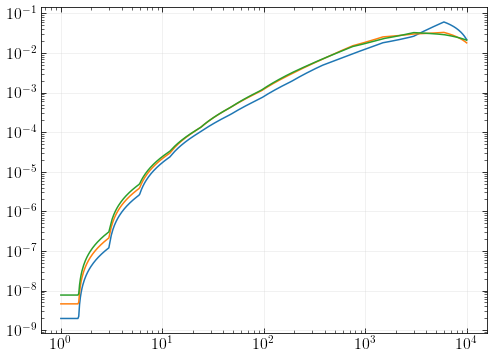

In [16]:
fig, ax = plt.subplots(figsize = (8, 6))
ens = np.logspace(0., 4., 500)

for dec in np.linspace(-np.pi/4., np.pi/4., 3):
    nov = Nova('hi', -2., 0.0, dec, 57000., row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None)
    aeff = nov.aeff(ens)
    plt.plot(ens, aeff)
    
plt.loglog()

(1.0, 10000.0)

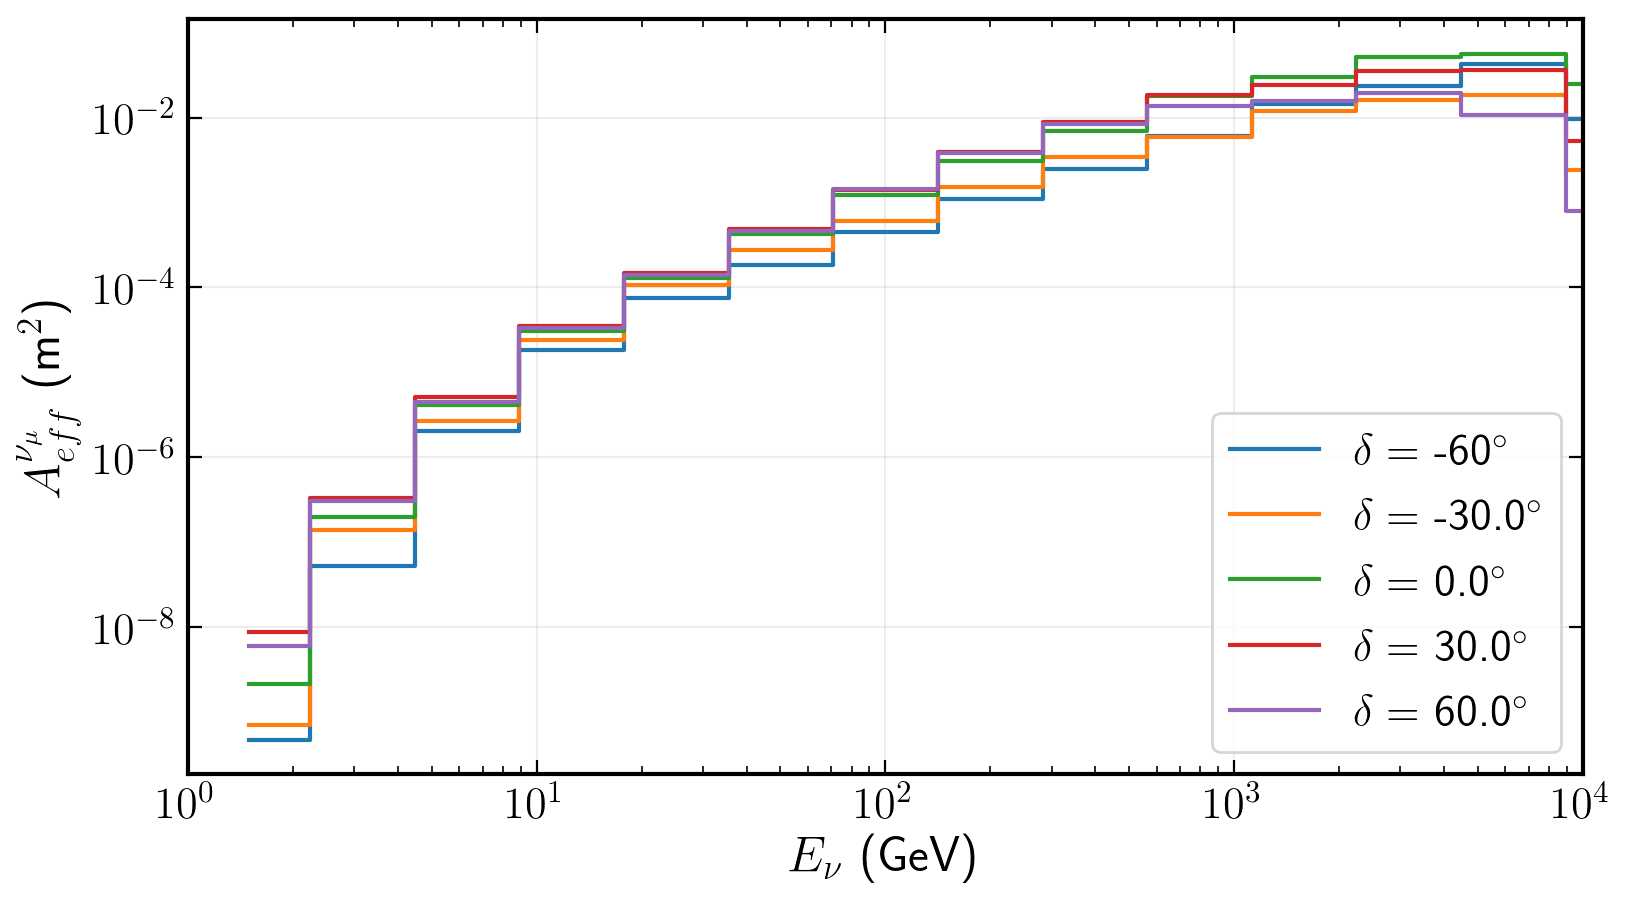

In [10]:
fig, ax = plt.subplots(figsize=(9.,5), dpi=200)

for dec in [-60, -30., 0., 30., 60.]:
    nov = Nova('hi', -2., 0.0, dec*np.pi/180., 57000., row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None)
    plt.step(mids(nov.aeff_dict['bins']), nov.aeff_dict['vals'], where='mid',
            label=r'$\delta = $ ' + str(dec) + r'$^{\circ}$')
plt.legend(loc=4)
plt.loglog()
plt.ylabel(r'$A^{\nu_{\mu}}_{eff}$ (m$^2$)')
plt.xlabel(r'$E_{\nu}$ (GeV)')
plt.xlim(1e0, 1e4)

In [13]:
gfu = np.load('/data/ana/analyses/gfu/current/IC86_2011_MC.npy')
gfu.dtype.names
from skylab.datasets import Datasets

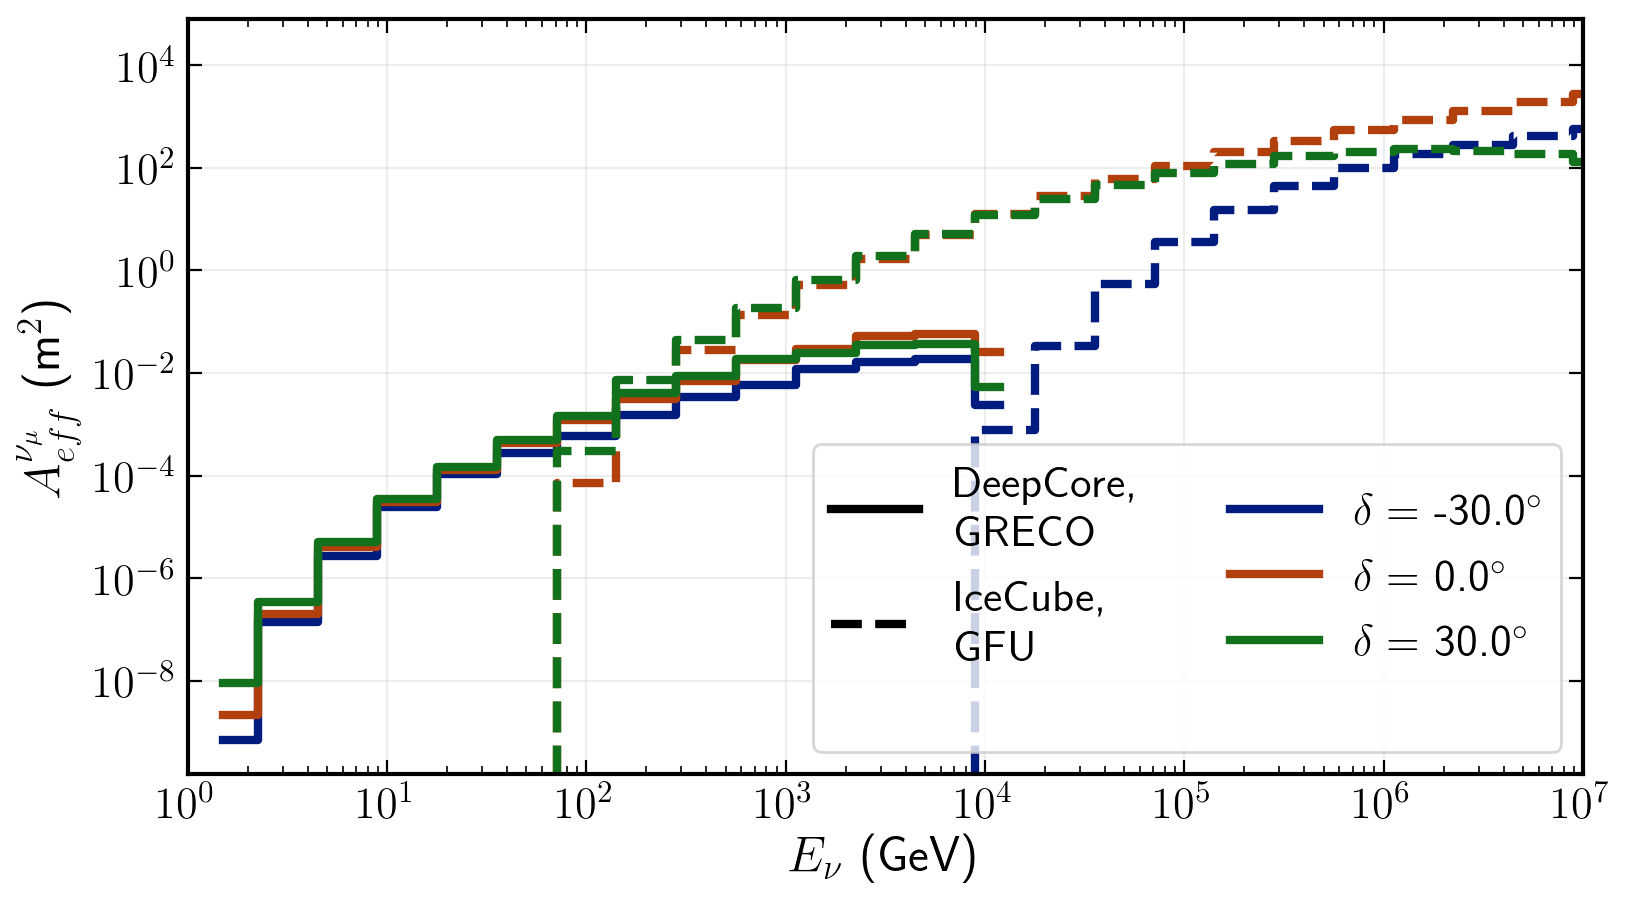

In [25]:
fig, ax = plt.subplots(figsize=(9.,5), dpi=200)

lw = 3

palette = sns.color_palette('dark')
custom_lines = [Line2D([0], [0], color='k', lw=lw, label = 'DeepCore,\n GRECO'),
               Line2D([0], [0], color='k', lw=lw, ls = '--', label = 'IceCube,\n GFU'),
               Line2D([0],[0],color="w", lw=0.0, label='')
               ]

for ii, dec in enumerate([-30., 0., 30.,]):
    nov = Nova('hi', -2., 0.0, dec*np.pi/180., 57000., row['Duration (gamma ray)'], 
               flux_norm=row['SPL flux']*1e-7, cutoff = None)
    
    ens = mids(nov.aeff_dict['bins']); aeff = nov.aeff_dict['vals']
    msk = aeff > 0
    plt.step(ens[msk], aeff[msk], where='mid',
            lw = lw, color = palette[ii])
    
    nov = Nova('hi', -2., 0.0, dec*np.pi/180., 57000., row['Duration (gamma ray)'], 
               flux_norm=row['SPL flux']*1e-7, cutoff = None, dataset=Datasets['GFU_v002p05'])
    ens = mids(nov.aeff_dict['bins']); aeff = nov.aeff_dict['vals']
    msk = aeff > 0
    plt.step(ens, aeff, where='mid',
            linestyle = '--', lw = lw, color = palette[ii])
    
    custom_lines.append(Line2D([0], [0], color=palette[ii], lw=lw, 
                              label = r'$\delta = $ ' + str(dec) + r'$^{\circ}$'))

    
#plt.text(2,2e2,'IceCube Preliminary', 
#         color=sns.xkcd_rgb['tomato red'], fontsize=24)
plt.legend(handles=custom_lines, loc='lower right', ncol=2)
plt.loglog()
plt.ylabel(r'$A^{\nu_{\mu}}_{eff}$ (m$^2$)')
plt.xlabel(r'$E_{\nu}$ (GeV)')
plt.xlim(1e0, 1e7)
plt.savefig('/home/apizzuto/public_html/novae/numu_effective_area.png', 
            dpi=150, bbox_inches='tight')
plt.show()

# GFU vs GRECO vs Both

In [65]:
df = pd.read_csv('/home/apizzuto/Nova/Novae_details.csv')
df = df.sort_values('Start Time (gamma ray)')

novae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], -1.*row['SPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None)
    novae.append(a)

In [66]:
from skylab.datasets import Datasets

In [67]:
exp, mc, livetime = Datasets['GFU_v002p05'].season('IC86, 2015')

In [68]:
Datasets['GFU_v002p05']

In [69]:
gfunovae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], row['SPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None,
            dataset=Datasets['GFU_v002p05'])
    gfunovae.append(a)
    


(1e-08, 10000.0)

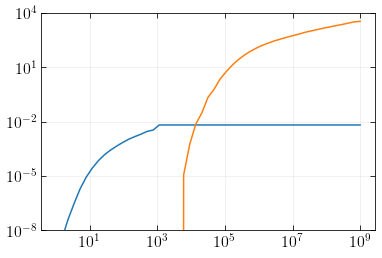

In [70]:
nova = novae[6]
gfu = gfunovae[6]

ens = np.logspace(0., 9., 51)
greco_aeff = nova.aeff(ens)
gfu_aeff = gfu.aeff(ens)

plt.plot(ens, greco_aeff)
plt.plot(ens, gfu_aeff)

plt.loglog()
plt.ylim(1e-8, 1e4)

# $dN/dE$ for single power laws first

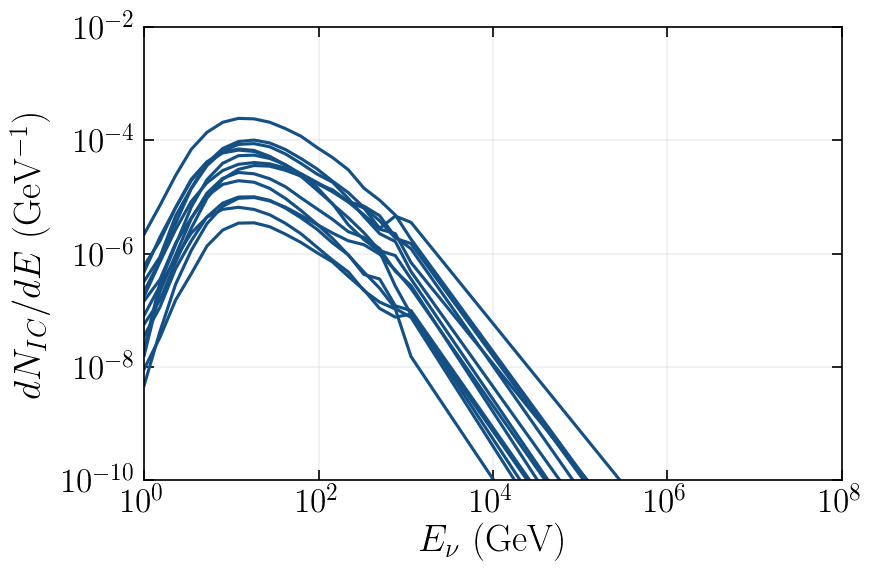

In [71]:
fig, ax = plt.subplots(dpi=150)
time_integrated = True
ens = np.logspace(0., 9., 51)
for nova in novae:
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e8)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ s$^{-1}$)'
plt.ylabel(ylabstr)
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

0.028224974116726795
0.00939750133227116
0.004890901138962008
0.0055933391305601566
0.0028178523833753684
0.000530951221075456
0.0013299127810084456
0.00045135509275786044
0.0010411348719990344
0.012541724464752624
0.012314556897262111
0.0017393481202228806
0.008736546450074396
0.007507137877104572


0.09711723587815285


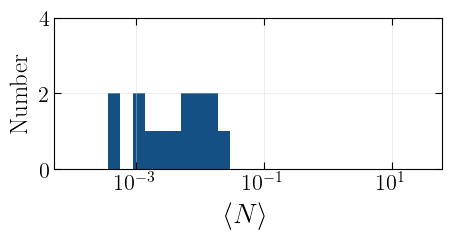

In [83]:
en_bins = np.logspace(0., 9., 50)
tots = []

for nova in novae:
    if nova.name == 'V679 Car':
        continue
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    tots.append(dnde[1])
    print dnde[1]
    
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
tots = np.array(tots)
plt.hist(tots, bins = np.logspace(-4., 1.5, 30), color = sns.xkcd_rgb['light navy'])
plt.xscale('log')
plt.ylim(0, 4)
plt.xlabel(r'$\langle N \rangle$', fontsize = 20)
plt.ylabel('Number')

print '\n\n' + str(np.sum(tots))

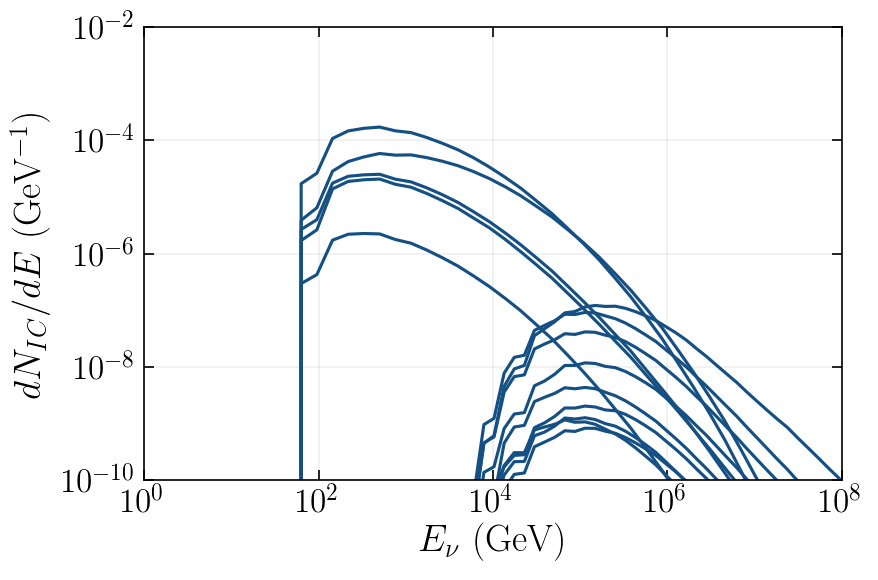

In [84]:
fig, ax = plt.subplots(dpi=150)
time_integrated = True
for nova in gfunovae:
    if nova.dec < 0.:
        ens = np.logspace(3.2, 9., 51)
    else:
        ens = np.logspace(0., 9., 51)
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e8)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$  s$^{-1}$)'
plt.ylabel(ylabstr)
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

1.4820814660612391
0.036708437213417044
0.13031061841809627
0.16659487448213658
0.0008301584615061661
0.011679677885963621
0.000558870832916596
0.0007481816322746166
0.003184570339952682
0.08192179459417254
0.22486958379146557
0.0018781745604124292
0.01079101268869033
1.055478622528122


3.207636043490366


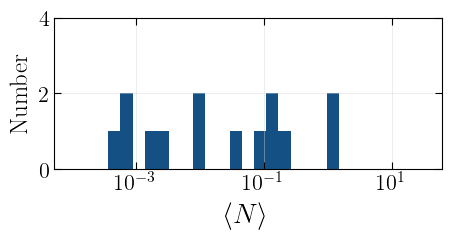

In [85]:
en_bins = np.logspace(0., 9., 50)
tots = []

for nova in gfunovae:
    if nova.name == 'V679 Car':
        continue
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    tots.append(dnde[1])
    print dnde[1]
    
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
tots = np.array(tots)
plt.hist(tots, bins = np.logspace(-4., 1.5, 30), color = sns.xkcd_rgb['light navy'])
plt.xscale('log')
plt.ylim(0, 4)
plt.xlabel(r'$\langle N \rangle$', fontsize = 20)
plt.ylabel('Number')

print '\n\n' + str(np.sum(tots))

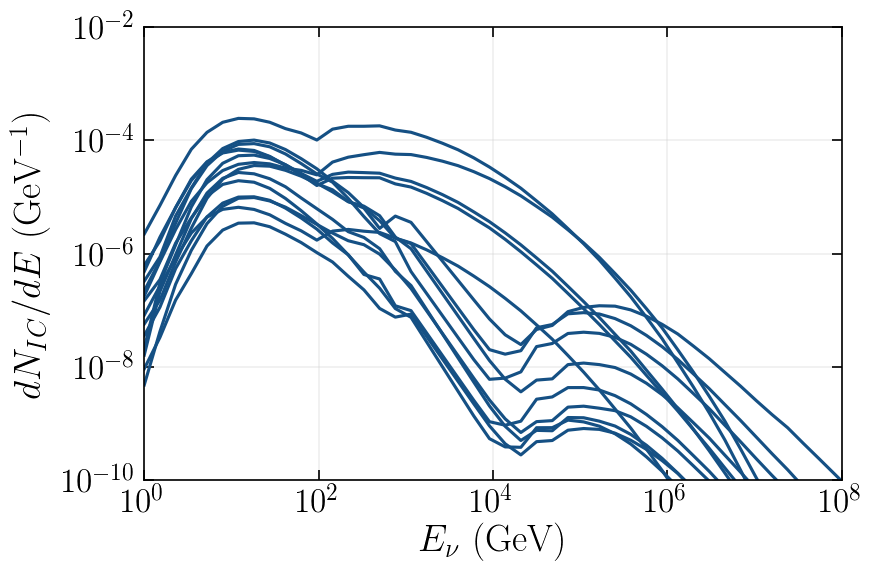

In [86]:
fig, ax = plt.subplots(dpi=150)
time_integrated = True
ens = np.logspace(0., 9., 51)
for nova, gfunova in zip(novae, gfunovae):
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    gdnde = gfunova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde + gdnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e8)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ s$^{-1}$)'
plt.ylabel(ylabstr)
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

1.510306440177966
0.0461059385456882
0.13520151955705828
0.17218821361269673
0.0036480108448815347
0.012210629107039078
0.0018887836139250417
0.001199536725032477
0.004225705211951716
0.09446351905892517
0.23718414068872767
0.00361752268063531
0.019527559138764725
1.0629857604052266


3.3047532793685184


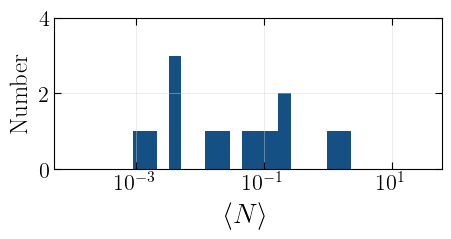

In [87]:
tots = []

for nova, gfunova in zip(novae, gfunovae):
    if nova.name == 'V679 Car':
        continue
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    gdnde = gfunova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    tots.append(dnde[1] + gdnde[1])
    print dnde[1] + gdnde[1]
    
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
tots = np.array(tots)
plt.hist(tots, bins = np.logspace(-4., 1.5, 30), color = sns.xkcd_rgb['light navy'])
plt.xscale('log')
plt.ylim(0, 4)
plt.xlabel(r'$\langle N \rangle$', fontsize = 20)
plt.ylabel('Number')

print '\n\n' + str(np.sum(tots))

# $dN/dE$ for power laws with cutoffs now

In [88]:
df = pd.read_csv('/home/apizzuto/Nova/Novae_details.csv')
df = df.sort_values('Start Time (gamma ray)')


novae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], -1*row['EPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['EPL flux']*1e-7, cutoff = row['EPL cutoff '])
    novae.append(a)
    
gfunovae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], -1*row['EPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['EPL flux']*1e-7, cutoff = row['EPL cutoff '],
            dataset=Datasets['GFU_v002p05'])
    gfunovae.append(a)

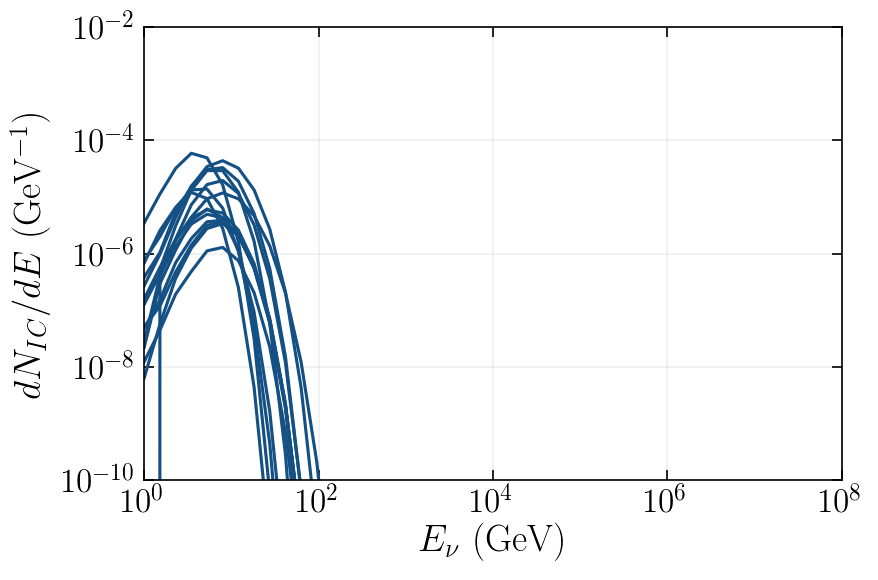

In [89]:
fig, ax = plt.subplots(dpi=150)
time_integrated = True
ens = np.logspace(0., 9., 51)
for nova in novae:
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e8)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ s$^{-1}$)'
plt.ylabel(ylabstr)
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

0.0002860377070515618
0.00033180323052774434
5.530118760754273e-05
8.069252274514113e-05
3.9091282615711285e-05
4.52705420757843e-05
0.00016442355610214846
1.2868878555998957e-05
3.907331219075578e-05
0.0005297204608172859
3.633814898502286e-05
3.379705601269124e-05
0.00019330597617883629
5.570756158781054e-05


0.0019034314230540355


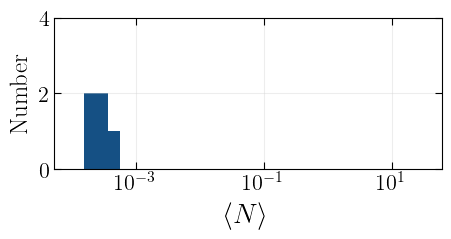

In [90]:
en_bins = np.logspace(0., 9., 50)
tots = []

for nova in novae:
    if nova.name == 'V679 Car':
        continue
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    tots.append(dnde[1])
    print dnde[1]
    
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
tots = np.array(tots)
plt.hist(tots, bins = np.logspace(-4., 1.5, 30), color = sns.xkcd_rgb['light navy'])
plt.xscale('log')
plt.ylim(0, 4)
plt.xlabel(r'$\langle N \rangle$', fontsize = 20)
plt.ylabel('Number')

print '\n\n' + str(np.sum(tots))

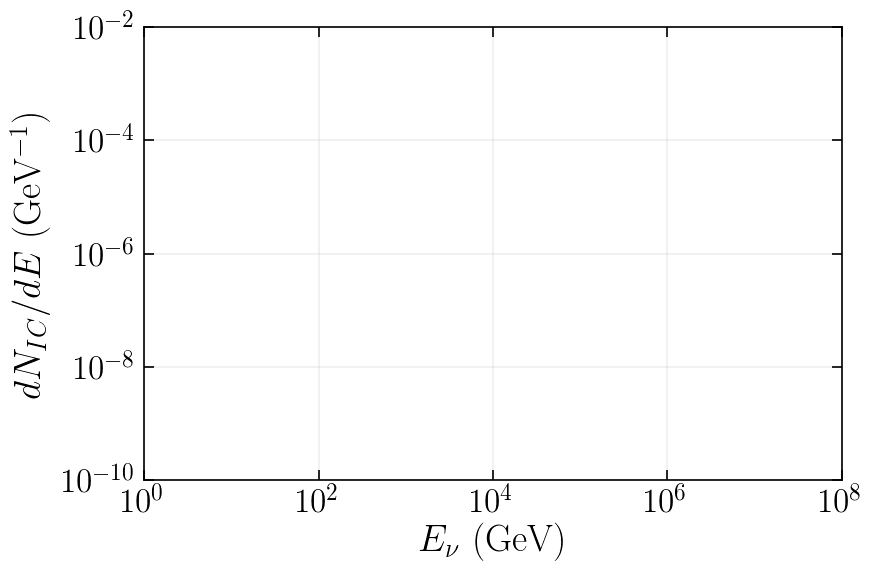

In [91]:
fig, ax = plt.subplots(dpi=150)
time_integrated = True
for nova in gfunovae:
    if nova.dec < 0.:
        ens = np.logspace(3.2, 9., 51)
    else:
        ens = np.logspace(0., 9., 51)
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e8)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$  s$^{-1}$)'
plt.ylabel(ylabstr)
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

2.453337817862062e-19
0.0
1.1611842584147103e-20
1.6859648829755416e-16
2.359045207770756e-95
9.667597180194697e-11
0.0
0.0
1.3242178650749638e-21
0.0
0.0
7.336764787760753e-55
3.821229167927091e-54
1.3894518535819573e-10


2.3562132601490084e-10


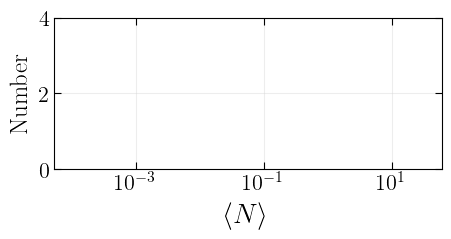

In [92]:
en_bins = np.logspace(0., 9., 50)
tots = []

for nova in gfunovae:
    if nova.name == 'V679 Car':
        continue
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    tots.append(dnde[1])
    print dnde[1]
    
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
tots = np.array(tots)
plt.hist(tots, bins = np.logspace(-4., 1.5, 30), color = sns.xkcd_rgb['light navy'])
plt.xscale('log')
plt.ylim(0, 4)
plt.xlabel(r'$\langle N \rangle$', fontsize = 20)
plt.ylabel('Number')

print '\n\n' + str(np.sum(tots))

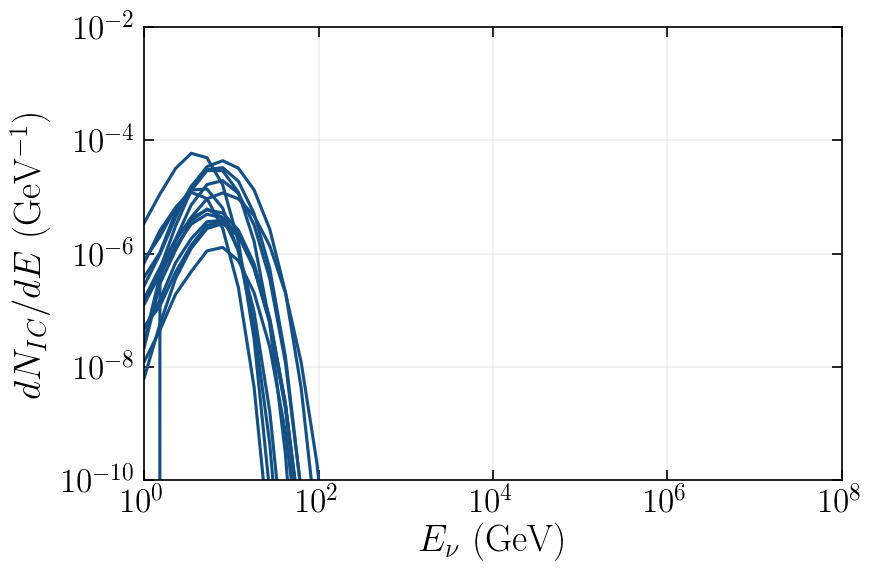

In [93]:
fig, ax = plt.subplots(dpi=150)
time_integrated = True
ens = np.logspace(0., 9., 51)
for nova, gfunova in zip(novae, gfunovae):
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    gdnde = gfunova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde + gdnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e8)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ s$^{-1}$)'
plt.ylabel(ylabstr)
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

0.00028603770705156205
0.00033180323052774434
5.5301187607542746e-05
8.069252274530972e-05
3.9091282615711285e-05
4.5270638751756103e-05
0.00016442355610214846
1.2868878555998957e-05
3.907331219075578e-05
0.0005297204608172859
3.633814898502286e-05
3.379705601269124e-05
0.00019330597617883629
5.5707700532995904e-05


0.0019034316586753613


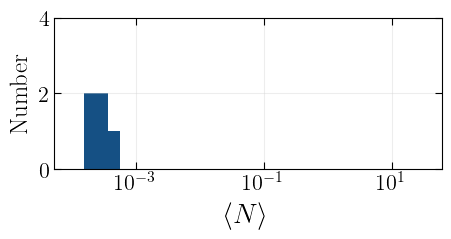

In [94]:
tots = []

for nova, gfunova in zip(novae, gfunovae):
    if nova.name == 'V679 Car':
        continue
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    gdnde = gfunova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    tots.append(dnde[1] + gdnde[1])
    print dnde[1] + gdnde[1]
    
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
tots = np.array(tots)
plt.hist(tots, bins = np.logspace(-4., 1.5, 30), color = sns.xkcd_rgb['light navy'])
plt.xscale('log')
plt.ylim(0, 4)
plt.xlabel(r'$\langle N \rangle$', fontsize = 20)
plt.ylabel('Number')

print '\n\n' + str(np.sum(tots))

[]

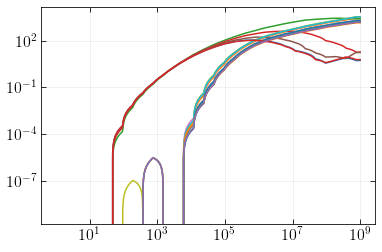

In [17]:
for nova in gfunovae:
    gfu_aeff = nova.aeff(ens)
    plt.plot(ens, gfu_aeff)
    
plt.loglog()

(1.0, 100000.0)

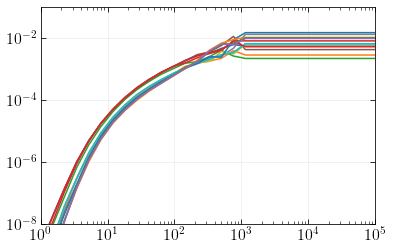

In [63]:
for nova in novae:
    aeff = nova.aeff(ens)
    plt.plot(ens, aeff)
    
plt.loglog()
plt.ylim(1e-8, 1e-1)
plt.xlim(1e0, 1e5)

In [1]:
decs = []
ras = []

import healpy as hp


for nova in novae:
    decs.append(nova.dec)
    ras.append(nova.ra)

fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(ras, decs)

#plt.scatter(ras, decs)

NameError: name 'novae' is not defined

In [22]:
decs = np.array(decs) * 180. / np.pi

In [10]:
row['Duration (gamma ray)']

3

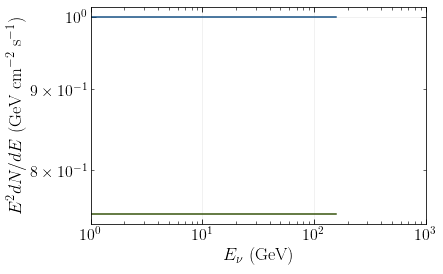

In [37]:
nova = Nova('test', -2.0, 0.0, np.radians(-23.0), 
            57657.0, 1e3/86400., flux_norm=1.0, cutoff = None)
    
ens = np.logspace(-1.5, 2.2, 100)

spec = nova.spectrum(ens)
plt.plot(ens, ens**2*spec, c = sns.xkcd_rgb['light navy'])
nu_spec = nova.neutrino_spectrum(ens)
plt.plot(ens, ens**2*nu_spec, c = sns.xkcd_rgb['navy green'])
    
plt.loglog()
#plt.ylim(1e-13, 5e-5)
plt.xlim(1e0, 1e3)
plt.xlabel(r'$E_{\nu}$ (GeV)')
plt.ylabel(r'$E^2 dN / dE$ (GeV cm$^{-2}$ s$^{-1}$)')
#plt.text(2e1, 1e-6, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}e^{-E/E_c}$')
#plt.savefig('/home/apizzuto/public_html/novae/all_spectra_with_cutoff.png', dpi=150, bbox_inches='tight')
plt.show()

In [38]:
N_persec = nova.calc_expected_signal_binned(np.logspace(1., 2., 201), time_integrated=False, neutrino = False)[1]
N = N_persec * 

0.13006996261377074